<a href="https://colab.research.google.com/github/moh3azzam/Data-Analysis/blob/master/BigMart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('ggplot')
base_color = sns.color_palette()[1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gathering Data 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/BigMart_Sales.csv')

## Introduction

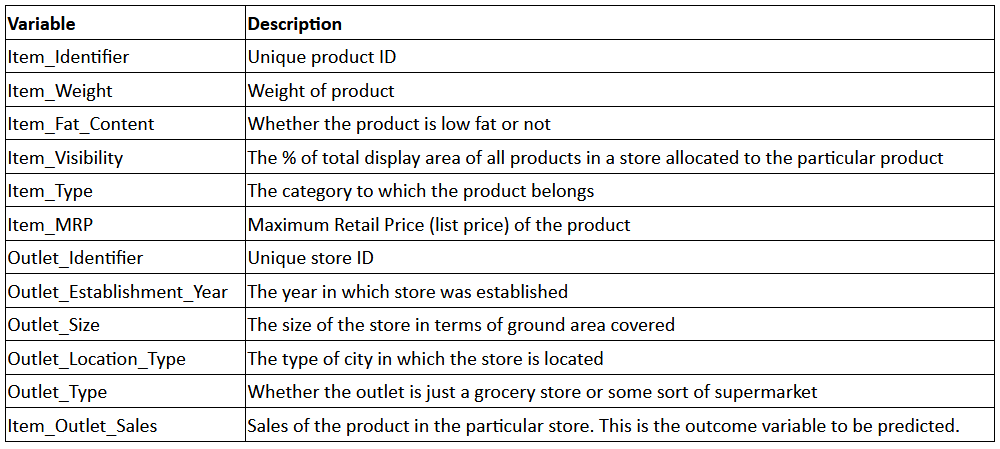

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Data Sets/BigMart_Sales.png', 
      width='1000') 


- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.



## Data Wrangling

### Assesing

In [ ]:
df.shape

(8523, 12)

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [ ]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# check the null value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# check unqiue value
columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
           'Outlet_Type']
for _ in columns:
    print(f'Column name is {_}')
    print(df[_].unique())
    print('=='*10)

Column name is Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Column name is Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Column name is Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Column name is Outlet_Size
['Medium' nan 'High' 'Small']
Column name is Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Column name is Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
(df['Item_Visibility'].unique())

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [ ]:
df['Item_Identifier'].nunique()

1559

In [ ]:
# check dublicate value
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
df[df['Item_Identifier'] == 'FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


### Observation

- Missing value
    - `Item_Weight` has 1463 missing value
    - `Outlet_Size` has 2410 missing value

- Change Data Type
    - `Outlet_Establishment_Year` change it to data

- Dublicate category with another name
    - `Item_Fat_Content` 
        - convert `Low Fat` , `low fat` and `LF`  to `lf`
        - convert `Regular` to `reg`

- Remove `OUT` string in `Outlet_Identifier`
- Multiple `Item_Visibility` with $100$
                

### Cleaning

#### Deal with missing value in `item_weight`

In [ ]:
# get item and his weight
item_weight = (df[['Item_Identifier', 'Item_Weight']]
 .dropna().drop_duplicates().sort_values(by='Item_Identifier'))
len(item_weight), type(item_weight)

(1555, pandas.core.frame.DataFrame)

In [ ]:
# convert item_weight to dict
item_weight_dict = item_weight.set_index('Item_Identifier').to_dict()['Item_Weight']

In [ ]:
# fill Nan from dictonary
df.Item_Weight = df.Item_Weight.fillna(df.Item_Identifier.map(item_weight_dict))

##### Check



In [ ]:
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


we notice that there are four item without price in data so we will remove them

In [ ]:
#  remove the four item that they don't have price
df.dropna(subset=['Item_Weight'], inplace=True)
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


#### Deal with missing value in `Outlet_Size`

In [ ]:
df[df['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
df['Outlet_Identifier'].value_counts(dropna = False)

OUT027    932
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: Outlet_Identifier, dtype: int64

In [ ]:
outlit_without_size = df[df['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()
outlit_without_size

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [ ]:
df[df['Outlet_Identifier'].isin(outlit_without_size)]['Outlet_Size'].isnull().sum()

2410



> We can notice that this outlits above that doesn't have outletsize



In [ ]:
# check the outliet type and location for this outlites
df[df['Outlet_Identifier'].isin(outlit_without_size)][['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type']].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Location_Type
OUT045             Supermarket Type1  Tier 2                  929
OUT017             Supermarket Type1  Tier 2                  926
OUT010             Grocery Store      Tier 3                  555
dtype: int64

In [ ]:
# find the most size for this type of outlit Supermarket Type1, Grocery Store
(df[df['Outlet_Type'].isin(['Supermarket Type1', 'Grocery Store'])]
 [['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']].value_counts())

Outlet_Type        Outlet_Location_Type  Outlet_Size
Supermarket Type1  Tier 3                High           932
                   Tier 2                Small          930
                   Tier 1                Small          930
                                         Medium         930
Grocery Store      Tier 1                Small          527
dtype: int64

we can notice the following 

- all of Outlet_Type ` supermarket type1` in tier 2 is `Small`
- all `Grocery Store` is `Small`



In [ ]:
df['Outlet_Size'].fillna('Small', inplace=True)

##### Check

In [ ]:
df['Outlet_Size'].isnull().sum()

0

#### Uniform `Item_Fat_Content` categories

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower()

In [ ]:
df['Item_Fat_Content'].unique()

array(['low fat', 'regular', 'lf', 'reg'], dtype=object)

In [ ]:
item_fat_cat = {'low fat':'lf', 'regular':'reg'}

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(item_fat_cat)

##### Check

In [ ]:
df['Item_Fat_Content'].unique()

array(['lf', 'reg'], dtype=object)

#### Remove OUT string in Outlet_Identifier

In [ ]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].str.replace('OUT', '')

##### Check

In [ ]:
df['Outlet_Identifier'].value_counts()

013    932
027    932
049    930
046    930
035    930
045    929
018    928
017    926
010    555
019    527
Name: Outlet_Identifier, dtype: int64

#### Multiple `Item_Visibility` with $100$

In [ ]:
df['Item_Visibility'] = df['Item_Visibility']*100

##### Check

In [ ]:
df['Item_Visibility']

0        1.604730
1        1.927822
2        1.676007
3        0.000000
4        0.000000
          ...    
8518     5.678339
8519     4.698243
8520     3.518627
8521    14.522065
8522     4.487828
Name: Item_Visibility, Length: 8519, dtype: float64

## Export 
export dataset after did data wrangling

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/BigMart_Sales_modified.csv', index=False)

## Feature Engineer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/BigMart_Sales_modified.csv')

In [ ]:
bin_edges = [4.555000, 12.650000, 16.850000, 21.350000] 
bin_names = ['small', 'medium', 'height'] 
df['weight_levels'] = pd.cut(df['Item_Weight'], bin_edges, labels=bin_names)

In [ ]:
df['total_quantity'] = round(df['Item_Outlet_Sales'] / df['Item_MRP']).astype(int)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/BigMart_Sales_modified.csv', index=False)

## EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/BigMart_Sales_modified.csv')

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,weight_levels,total_quantity
0,FDA15,9.30,lf,1.604730,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,small,15
1,DRC01,5.92,reg,1.927822,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,small,9


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,6.611236,141.010019,29.110694,2181.188779
std,4.646098,5.158555,62.283594,13.930430,1706.511093
min,4.555000,0.000000,31.290000,10.000000,33.290000
25%,8.785000,2.698336,93.844900,17.000000,834.247400
50%,12.650000,5.392459,143.047000,27.000000,1794.331000
75%,16.850000,9.455824,185.676600,45.000000,3100.630600
max,21.350000,32.839095,266.888400,49.000000,13086.964800


### Find the dist of weight?

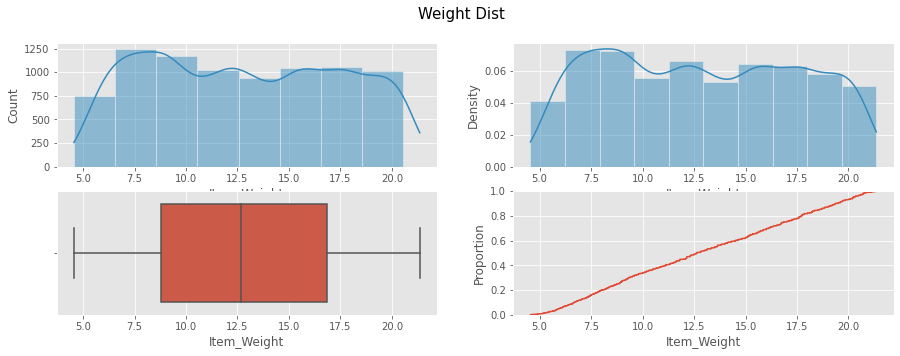

In [ ]:
bin_edges = np.arange(df['Item_Weight'].min(), df['Item_Weight'].max()+1, 2)

plt.subplot(221)
sns.histplot(df['Item_Weight'], kde=True, bins=bin_edges);

plt.subplot(222)
sns.histplot(df['Item_Weight'], kde=True, bins=10, stat='density');

plt.subplot(223)
sns.boxplot(x=df['Item_Weight'])

plt.subplot(224)
sns.ecdfplot(df['Item_Weight']);

plt.suptitle('Weight Dist', fontsize=15)
plt.show()

- we can see the weight not normal shape  
- $80\%$ product his weight $\le 17.5$

### What is the most weight 

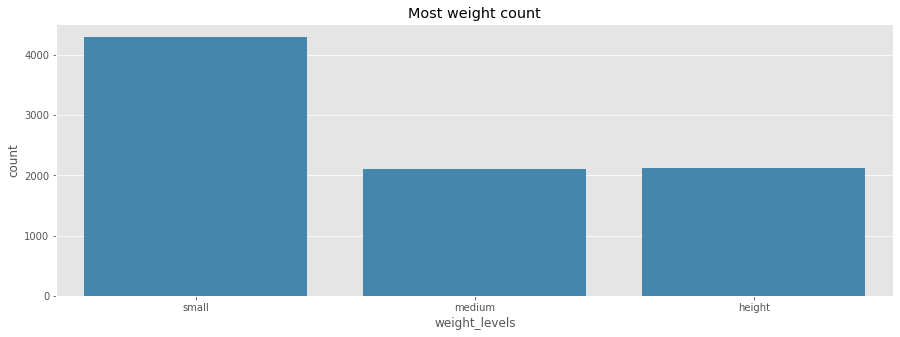

In [ ]:
sns.countplot(data = df, x = 'weight_levels', color=base_color)
plt.title('Most weight count');

- the most product weight is between 4kg to 12.5kg

### what is the most Item_Fat_Content in market


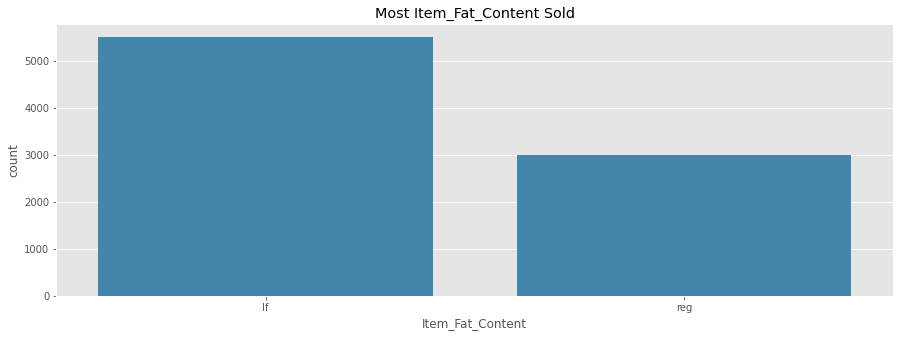

In [ ]:
sns.countplot(data = df, x = 'Item_Fat_Content', color=base_color)
plt.title('Most Item_Fat_Content Sold');

- we can see that customers concern about low fat product

### What is Item_Visibility dist 

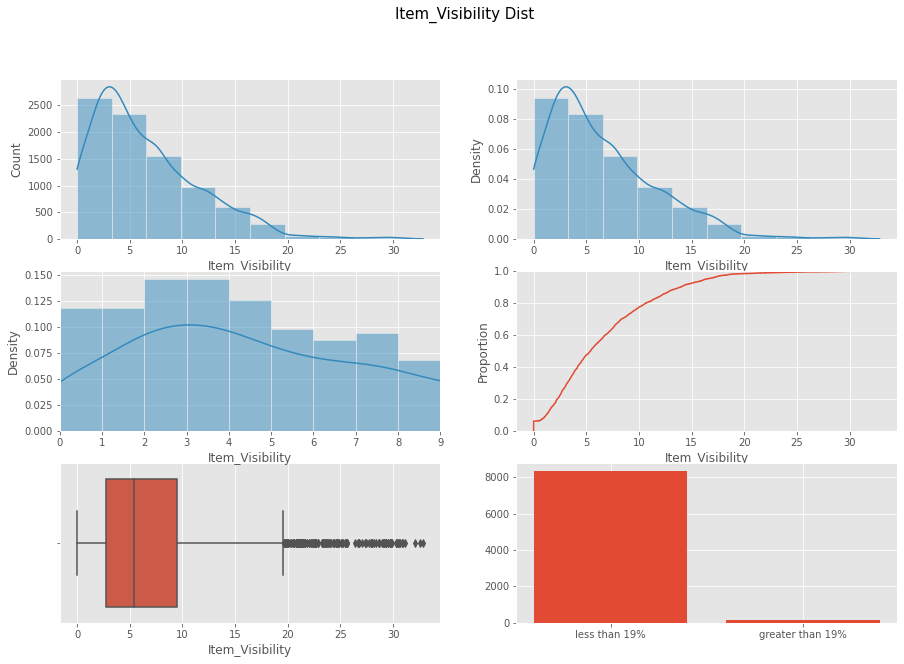

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.histplot(df['Item_Visibility'], kde=True, bins=10)

plt.subplot(322)
sns.histplot(df['Item_Visibility'], kde=True, bins=10, stat='density')

plt.subplot(325)
sns.boxplot(x = df['Item_Visibility'])

plt.subplot(324)
sns.ecdfplot(df['Item_Visibility']);

plt.subplot(323)
bin_edges = np.arange(df['Item_Visibility'].min(), 10, 1)
sns.histplot(df['Item_Visibility'], kde=True, bins=bin_edges, stat='density')
plt.xlim(df['Item_Visibility'].min(), 9)

plt.subplot(326)
Item_Visibility_count = {'less than 19%': df[df['Item_Visibility']<19].Item_Visibility.count(), 
                         'greater than 19%': df[df['Item_Visibility']>=19].Item_Visibility.count(),}
plt.bar(x=Item_Visibility_count.keys(), height=Item_Visibility_count.values());

plt.suptitle('Item_Visibility Dist', fontsize=15)
plt.show()

- $80\%$ of product take $10\%$ visibality in outliet
- most of product his visiabality between $2.5\% \to 10\%$ 
- most denisity for visibiltiy between $2\% \to 4\%$

### What is the most Item_Type?


Text(0.5, 1.0, 'the most Item type sold')

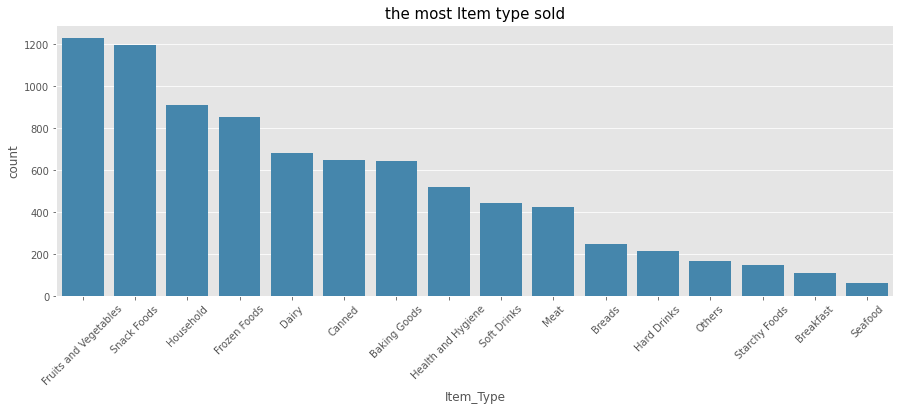

In [ ]:
cat_order = df['Item_Type'].value_counts().index
sns.countplot(x='Item_Type', data=df, color=base_color, order = cat_order)
plt.xticks(rotation=45)
plt.title('the most Item type sold', fontsize=15)

- The most item type sold is Fruits and snacks and frozen food

### What is price dist

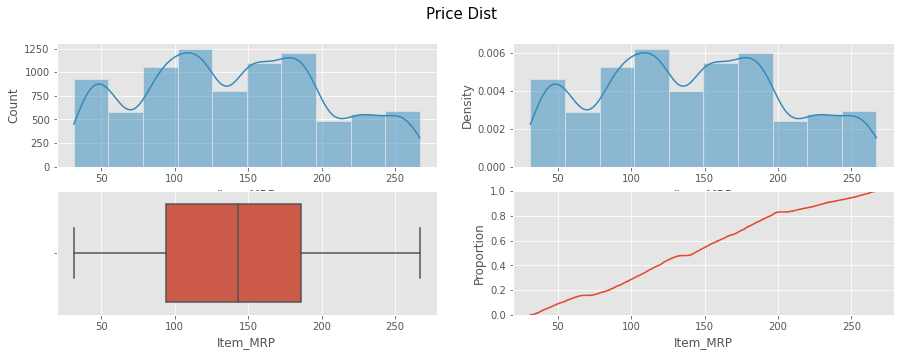

In [ ]:
plt.subplot(221)
sns.histplot(df['Item_MRP'], kde=True, bins=10)

plt.subplot(222)
sns.histplot(df['Item_MRP'], kde=True, bins=10, stat='density')

plt.subplot(223)
sns.boxplot(x = df['Item_MRP'])

plt.subplot(224)
sns.ecdfplot(df['Item_MRP']);


plt.suptitle('Price Dist', fontsize=15)
plt.show()

In [ ]:
df['Item_MRP'].describe()

count    8519.000000
mean      141.010019
std        62.283594
min        31.290000
25%        93.844900
50%       143.047000
75%       185.676600
max       266.888400
Name: Item_MRP, dtype: float64

- most product price between $100 \to 175$

### What is the size of outlite has most sold product

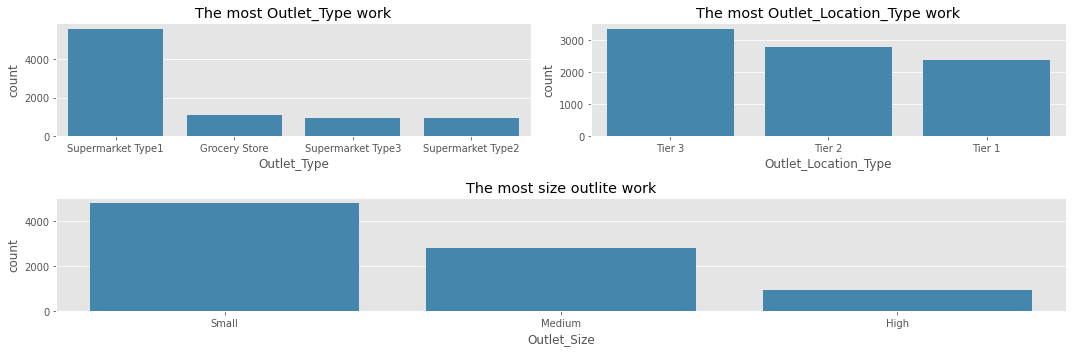

In [ ]:
plt.subplot(212)
cat_order = df['Outlet_Size'].value_counts().index
sns.countplot(x = df['Outlet_Size'], order=cat_order, color=base_color)
plt.title('The most size outlite work');

plt.subplot(221)
cat_order = df['Outlet_Type'].value_counts().index
sns.countplot(x = df['Outlet_Type'], order=cat_order, color=base_color)
plt.title('The most Outlet_Type work');

plt.subplot(222)
cat_order = df['Outlet_Location_Type'].value_counts().index
sns.countplot(x = df['Outlet_Location_Type'], order=cat_order, color=base_color)
plt.title('The most Outlet_Location_Type work');

plt.tight_layout()
plt.show()

- the small outliet has most sales product
- suptermarket type 1 has most sales product
- tire 3 location has most sales product

### What is the dist of Item_Outlet_Sales

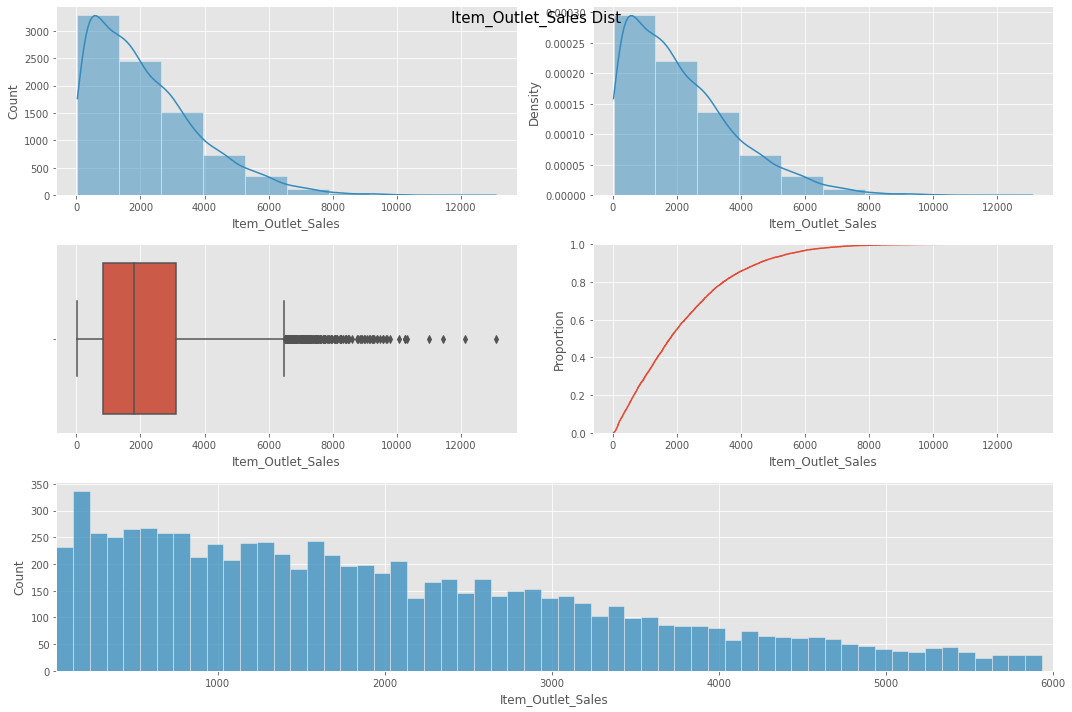

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.histplot(df['Item_Outlet_Sales'], kde=True, bins=10)

plt.subplot(322)
sns.histplot(df['Item_Outlet_Sales'], kde=True, bins=10, stat='density')

plt.subplot(323)
sns.boxplot(x = df['Item_Outlet_Sales'])

plt.subplot(324)
sns.ecdfplot(df['Item_Outlet_Sales']);

plt.subplot(313)
bin_edges = np.arange(df['Item_Outlet_Sales'].min(), 6000, 100)
sns.histplot(df['Item_Outlet_Sales'], bins=bin_edges)
plt.xlim(df['Item_Outlet_Sales'].min(), 6000)

plt.suptitle('Item_Outlet_Sales Dist', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
df['Item_Outlet_Sales'].describe()

count     8519.000000
mean      2181.188779
std       1706.511093
min         33.290000
25%        834.247400
50%       1794.331000
75%       3100.630600
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,weight_levels,total_quantity
0,FDA15,9.30,lf,1.604730,Dairy,249.8092,49,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,3735.1380,small,15
1,DRC01,5.92,reg,1.927822,Soft Drinks,48.2692,18,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,443.4228,small,9


### what is the top 10 item sold at every year

In [ ]:
top_item_sold_year = df.sort_values(['total_quantity'], ascending=False).groupby('Outlet_Establishment_Year').head(10)
top_item_sold_year

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,weight_levels,total_quantity
5759,DRI39,13.80,lf,9.659206,Dairy,54.8930,27,1985,Medium,Tier 3,Supermarket Type3,3112.6150,medium,57
7792,NCL30,18.10,lf,4.870343,Household,125.9336,27,1985,Medium,Tier 3,Supermarket Type3,7158.6816,height,57
7184,NCE42,21.10,lf,1.055095,Household,234.9958,27,1985,Medium,Tier 3,Supermarket Type3,13086.9648,height,56
8076,FDU09,7.71,reg,6.627464,Snack Foods,54.1956,27,1985,Medium,Tier 3,Supermarket Type3,3002.7580,small,55
3656,FDX37,16.20,lf,6.272412,Canned,100.5700,27,1985,Medium,Tier 3,Supermarket Type3,5093.3700,medium,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,FDT56,16.00,reg,19.347800,Fruits and Vegetables,55.9246,10,1998,Small,Tier 3,Grocery Store,405.4722,medium,7
3178,FDV59,13.35,lf,8.038742,Breads,219.2166,10,1998,Small,Tier 3,Grocery Store,1524.0162,medium,7
6363,NCX29,10.00,lf,14.922305,Health and Hygiene,145.8102,10,1998,Small,Tier 3,Grocery Store,874.8612,small,6
4527,FDZ16,16.85,reg,26.756591,Frozen Foods,194.1478,10,1998,Small,Tier 3,Grocery Store,1162.4868,medium,6


In [ ]:
years = df['Outlet_Establishment_Year'].unique().astype(int)
years.sort()
years

array([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009])

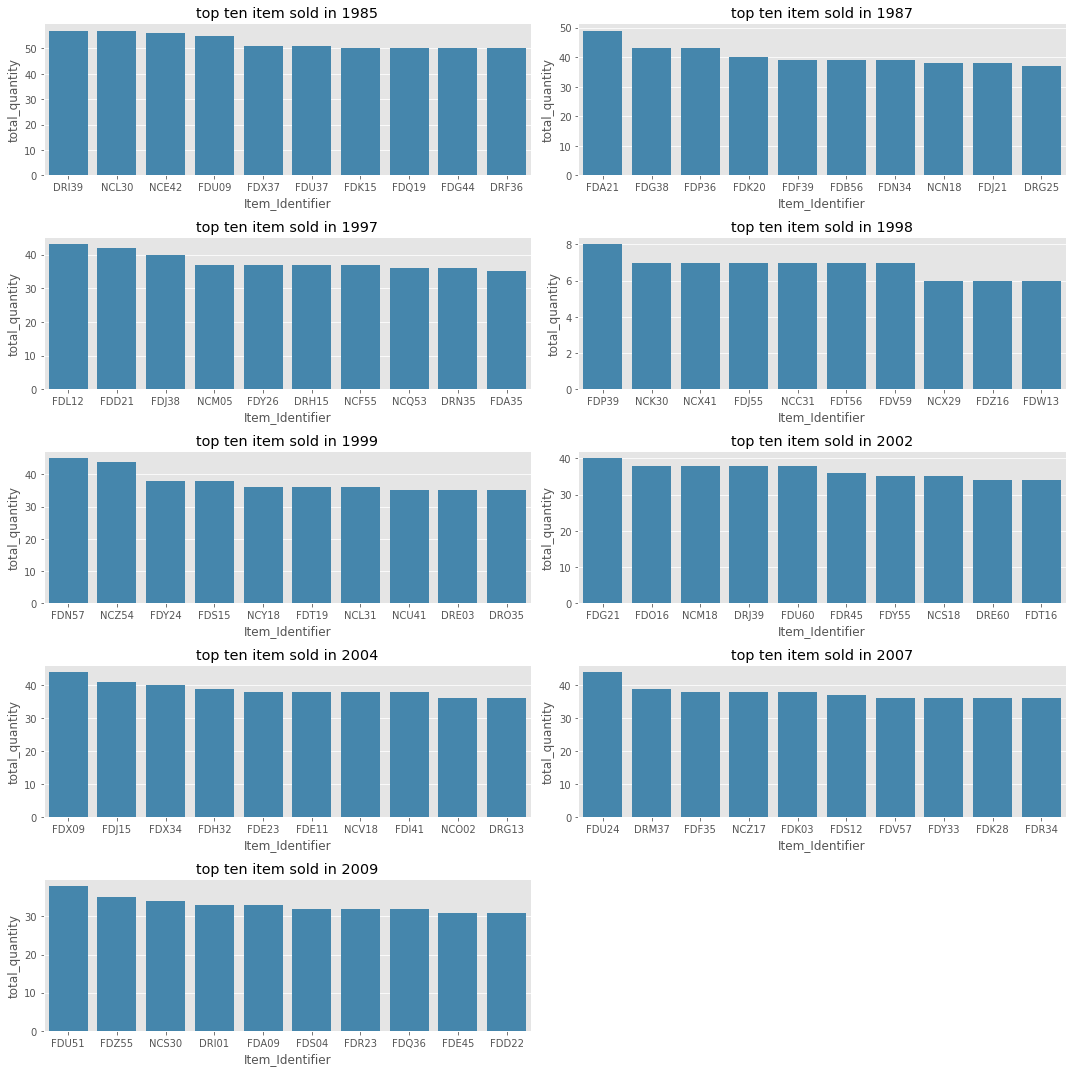

In [ ]:
plt.figure(figsize=(15,15))
count = 1
for y in years:
    items = top_item_sold_year[top_item_sold_year['Outlet_Establishment_Year'] == y]

    plt.subplot(f"52{count}")
    sns.barplot(x='Item_Identifier', y='total_quantity', data =items, color=base_color)
    plt.title(f"top ten item sold in {y}")

    count += 1
plt.tight_layout()

### What is Top 10 item make revenue

In [ ]:
top_make_revenue_year = df.sort_values(['Item_Outlet_Sales'], ascending=False).groupby('Outlet_Establishment_Year').head(10)
top_make_revenue_year

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,weight_levels,total_quantity
7184,NCE42,21.100,lf,1.055095,Household,234.9958,27,1985,Medium,Tier 3,Supermarket Type3,13086.9648,height,56
5219,FDQ19,7.350,reg,1.429556,Fruits and Vegetables,242.6512,27,1985,Medium,Tier 3,Supermarket Type3,12117.5600,small,50
1449,FDZ20,16.100,lf,0.000000,Fruits and Vegetables,253.0356,27,1985,Medium,Tier 3,Supermarket Type3,11445.1020,medium,45
4346,FDP33,18.700,lf,8.883995,Snack Foods,254.2672,27,1985,Medium,Tier 3,Supermarket Type3,10993.6896,height,43
6537,FDI50,8.420,reg,3.069331,Canned,228.0352,27,1985,Medium,Tier 3,Supermarket Type3,10306.5840,small,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,FDY02,8.945,reg,14.670131,Dairy,262.2910,10,1998,Small,Tier 3,Grocery Store,1314.9550,small,5
4907,FDK28,5.695,lf,10.978406,Frozen Foods,256.0646,10,1998,Small,Tier 3,Grocery Store,1288.3230,small,5
5430,FDP15,15.200,lf,0.000000,Meat,256.0330,10,1998,Small,Tier 3,Grocery Store,1281.6650,medium,5
4527,FDZ16,16.850,reg,26.756591,Frozen Foods,194.1478,10,1998,Small,Tier 3,Grocery Store,1162.4868,medium,6


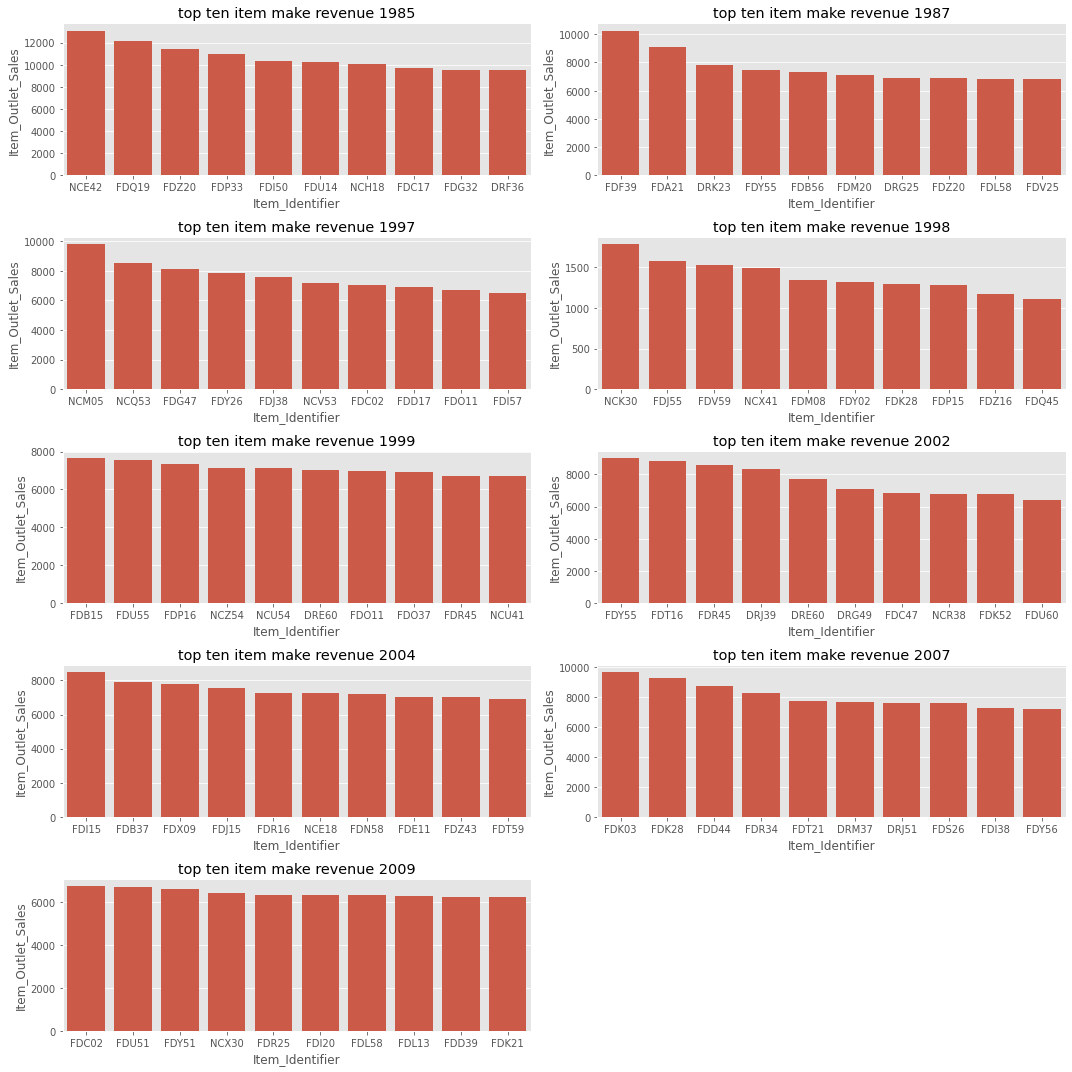

In [ ]:
plt.figure(figsize=(15,15))
count = 1
for y in years:
    items = top_make_revenue_year[top_make_revenue_year['Outlet_Establishment_Year'] == y]

    plt.subplot(f"52{count}")
    sns.barplot(x='Item_Identifier', y='Item_Outlet_Sales', data =items, color=base_color)
    plt.title(f"top ten item make revenue {y}")

    count += 1
plt.tight_layout()

### which item fat make more revenue

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,weight_levels,total_quantity,Item_Identifier_3
0,FDA15,9.30,lf,1.604730,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,small,15,FD
1,DRC01,5.92,reg,1.927822,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,small,9,DR


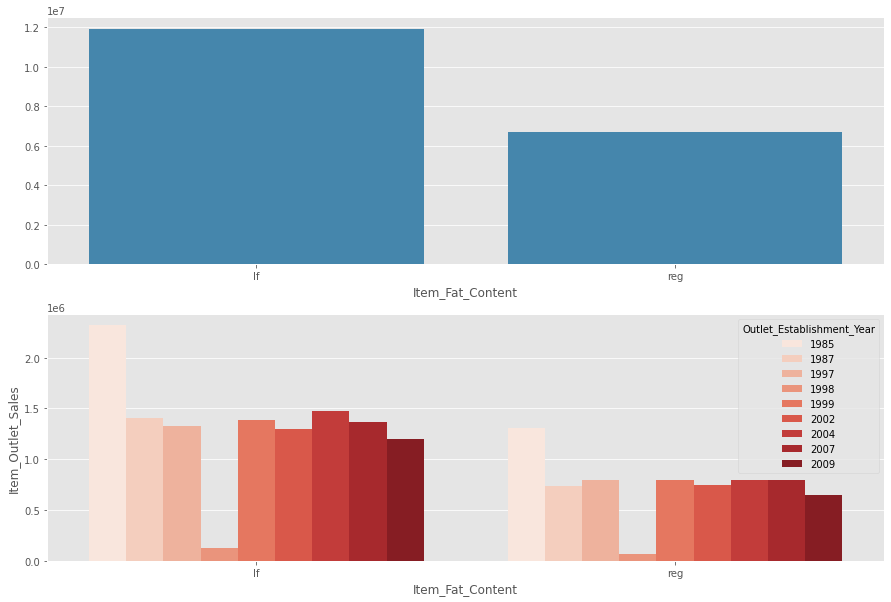

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
x = df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()
sns.barplot(x=x.index, y=x.values, color=base_color)

plt.subplot(212)
x = df.groupby(['Item_Fat_Content', 'Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()
x = x.reset_index(level=[0,1])
sns.barplot(x=x['Item_Fat_Content'], y=x['Item_Outlet_Sales'], 
            hue=x['Outlet_Establishment_Year'], palette = 'Reds')

plt.show()

- low fat make more revenues around all years

### Which item type make

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

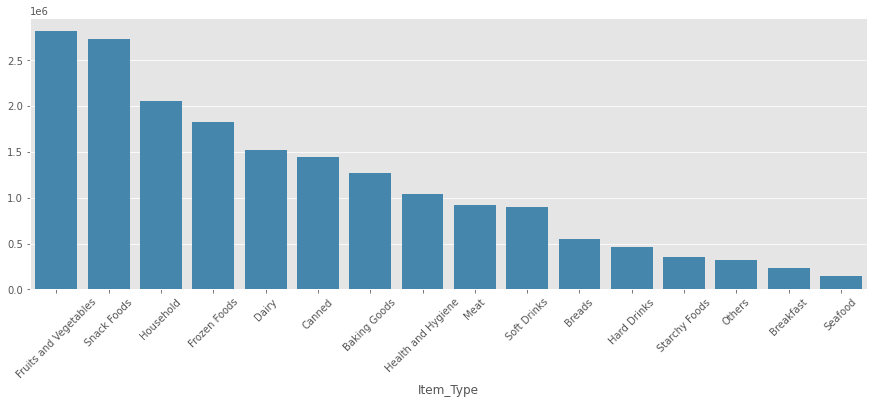

In [ ]:
x = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
order = x.sort_values(ascending=False).index
sns.barplot(x=x.index, y=x.values, order=order, color=base_color)
plt.xticks(rotation=45);

### Which outlet make more reveue?

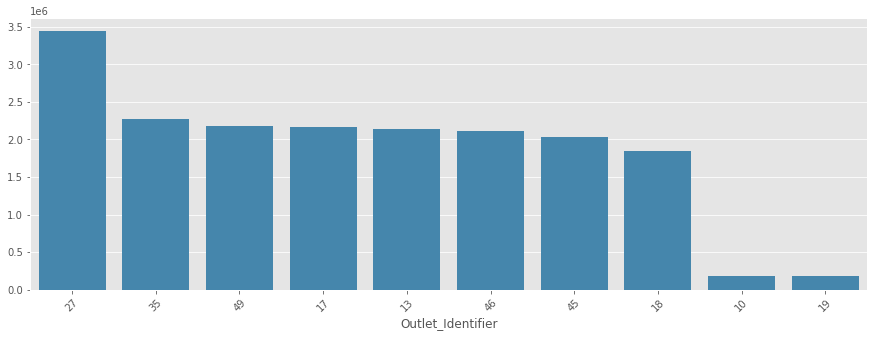

In [ ]:
x = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
order = x.sort_values(ascending=False).index
sns.barplot(x=x.index, y=x.values, order=order, color=base_color)
plt.xticks(rotation=45);

### Which Outlet_Type make more reveue?

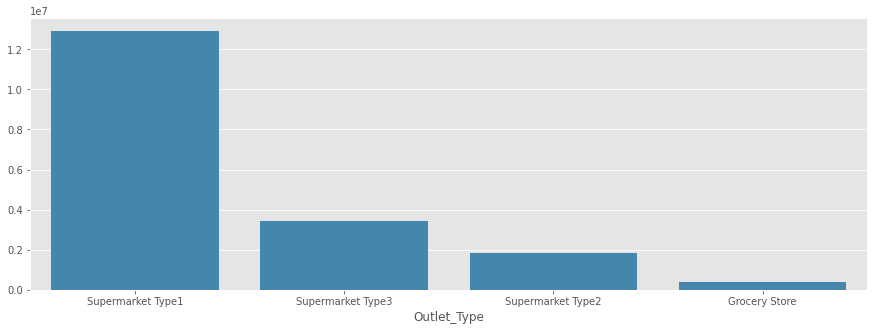

In [ ]:
x = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
order = x.sort_values(ascending=False).index
sns.barplot(x=x.index, y=x.values, order=order, color=base_color)
# plt.xticks(rotation=45);

### Which Outlet_Size make more reveue?

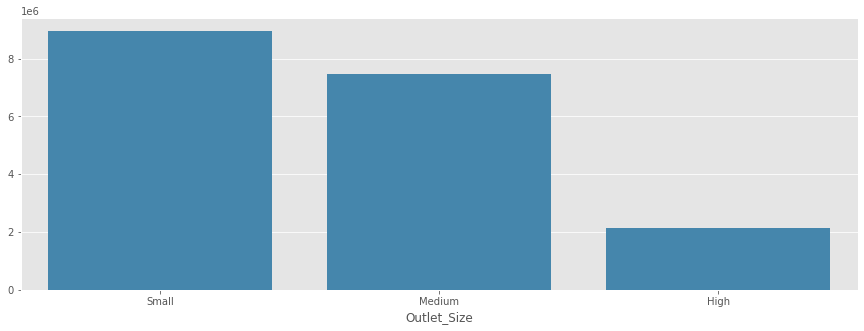

In [ ]:
x = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
order = x.sort_values(ascending=False).index
sns.barplot(x=x.index, y=x.values, order=order, color=base_color)
# plt.xticks(rotation=45);

In [ ]:
x = df.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()
x

Outlet_Identifier  Outlet_Establishment_Year
10                 1998                         1.883402e+05
13                 1987                         2.142664e+06
17                 2007                         2.167465e+06
18                 2009                         1.851823e+06
19                 1985                         1.795736e+05
27                 1985                         3.444468e+06
35                 2004                         2.268123e+06
45                 2002                         2.036725e+06
46                 1997                         2.118395e+06
49                 1999                         2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,weight_levels,total_quantity,Item_Identifier_3
0,FDA15,9.30,lf,1.604730,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,small,15,FD
1,DRC01,5.92,reg,1.927822,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,small,9,DR
